In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Upload the file in colab
dataSets_X = np.load('X.npy')   
dataSets_Y = np.load('Y.npy')
print(dataSets_X.shape)
print(dataSets_Y.shape)
print(type(dataSets_X),type(dataSets_Y))

x_train,x_test, y_train,y_test = train_test_split(dataSets_X,dataSets_Y,test_size=0.25,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2062, 64, 64)
(2062, 10)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1546, 64, 64)
(516, 64, 64)
(1546, 10)
(516, 10)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


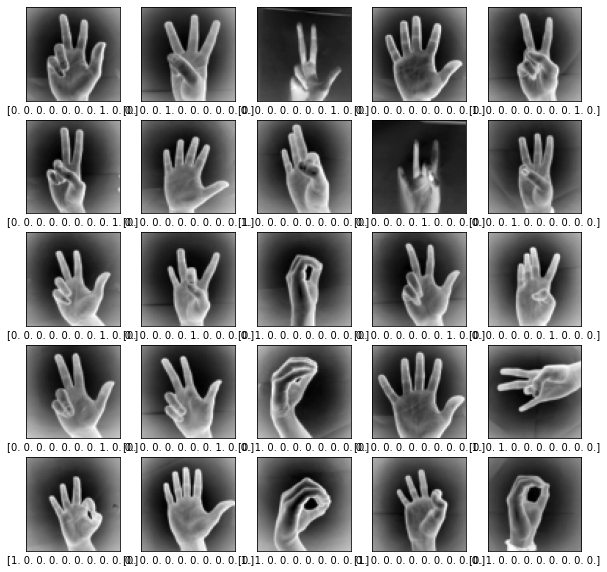

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])

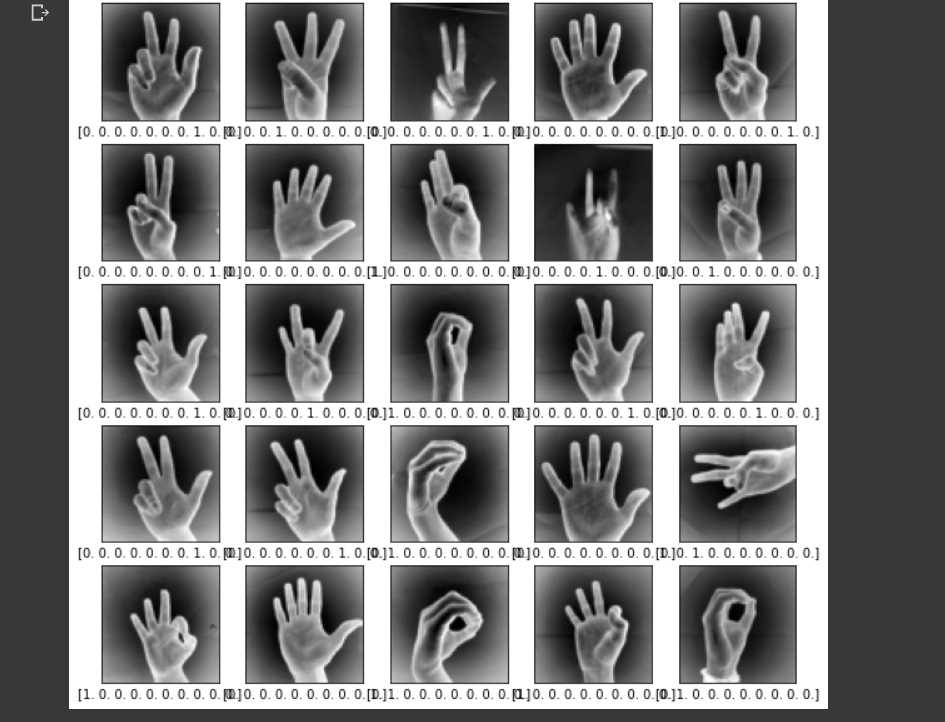

In [ ]:
# # Normalization
x_train = x_train/255
x_test = x_test/255
# print(x_train[0])
x_train.shape

(1546, 64, 64)

In [ ]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train[:10])

In [ ]:
# n1 = x_train.size
# print("x_trains.size :",n1)
# N=4
# M1=n1//N
# n2 = x_test.size
# print("x_test.size : ",n2)
# M2 = n2//N
# x_train = x_train.reshape((M1,N))
# x_test = x_test.reshape((M2,N))
x_train = x_train.reshape(1546,64,64,1)
x_test = x_test.reshape(516,64,64,1)
# y_train = y_train.reshape(1546,10)
# y_test = y_test.reshape(516,10)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1546, 64, 64, 1)
(516, 64, 64, 1)
(1546, 10)
(516, 10)


In [ ]:
# Build the CNN Model
model = Sequential()
model.add(Conv2D(32,(3,3),strides=1,activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Conv2D(64,(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
testing_epoch = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
49/49 [==============================] - 12s 51ms/step - loss: 2.3039 - accuracy: 0.0957 - val_loss: 2.3029 - val_accuracy: 0.0891
Epoch 2/100
49/49 [==============================] - 2s 44ms/step - loss: 2.3029 - accuracy: 0.0828 - val_loss: 2.3032 - val_accuracy: 0.0891
Epoch 3/100
49/49 [==============================] - 2s 44ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3037 - val_accuracy: 0.0891
Epoch 4/100
49/49 [==============================] - 2s 44ms/step - loss: 2.3027 - accuracy: 0.1048 - val_loss: 2.3038 - val_accuracy: 0.0891
Epoch 5/100
49/49 [==============================] - 2s 41ms/step - loss: 2.3025 - accuracy: 0.1048 - val_loss: 2.3041 - val_accuracy: 0.0891
Epoch 6/100
49/49 [==============================] - 2s 44ms/step - loss: 2.3025 - accuracy: 0.1048 - val_loss: 2.3040 - val_accuracy: 0.0891
Epoch 7/100
49/49 [==============================] - 2s 44ms/step - loss: 2.3026 - accuracy: 0.1048 - val_loss: 2.3044 - val_accuracy: 0.0891
Epoch

                   Executing the model for 100 Epochs
                        Final Epoch Test 
  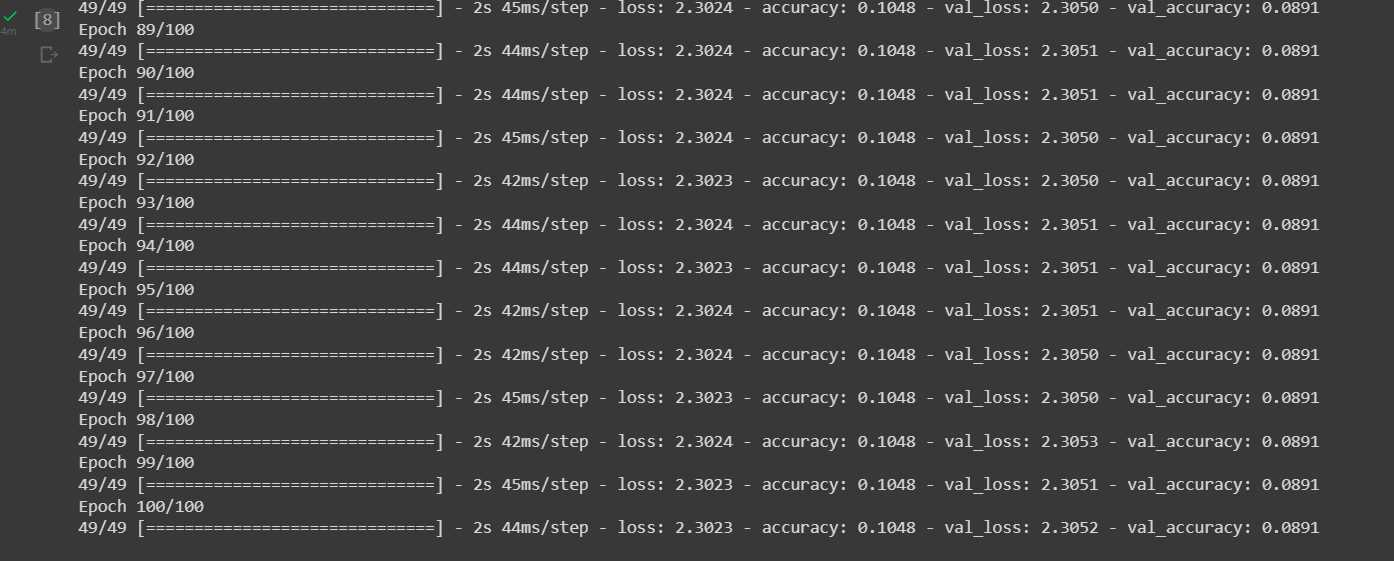

In [ ]:
epoch_history = pd.DataFrame(testing_epoch.history)
epoch_history['Epochs'] = testing_epoch.epoch
epoch_history.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
95,2.302361,0.104787,2.305009,0.089147,95
96,2.302331,0.104787,2.305043,0.089147,96
97,2.302383,0.104787,2.305291,0.089147,97
98,2.302290,0.104787,2.305072,0.089147,98
99,2.302345,0.104787,2.305229,0.089147,99


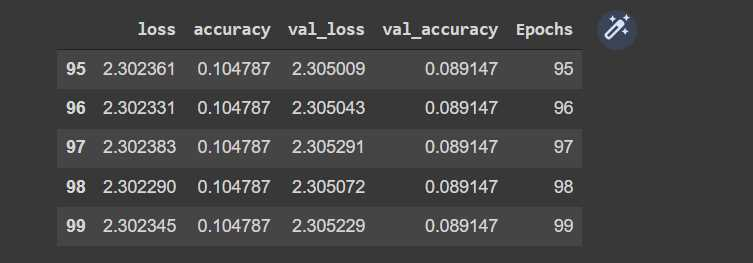

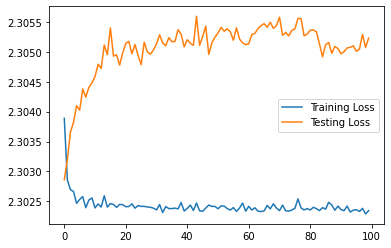

In [ ]:
plt.plot(epoch_history['Epochs'],epoch_history['loss'],label='Training Loss')
plt.plot(epoch_history['Epochs'],epoch_history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

                         Depict loss vs. val_loss on line chart
  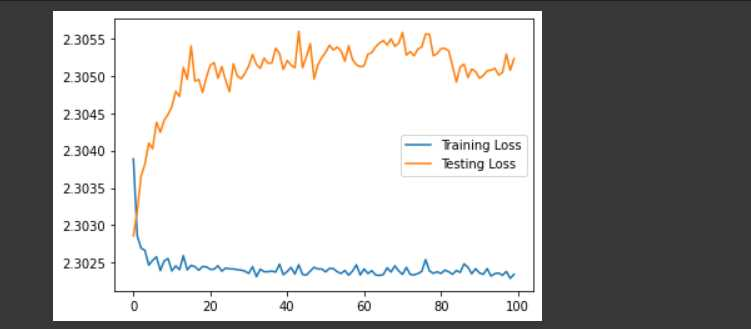

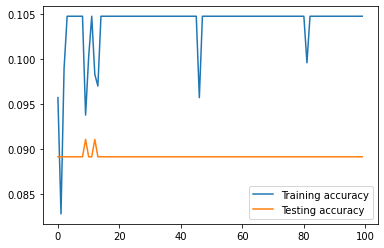

In [ ]:
plt.plot(epoch_history['Epochs'],epoch_history['accuracy'],label='Training accuracy')
plt.plot(epoch_history['Epochs'],epoch_history['val_accuracy'],label='Testing accuracy')
plt.legend()
plt.show()

              Depict accuracy vs. val_accuracy on line chart.           
                   
  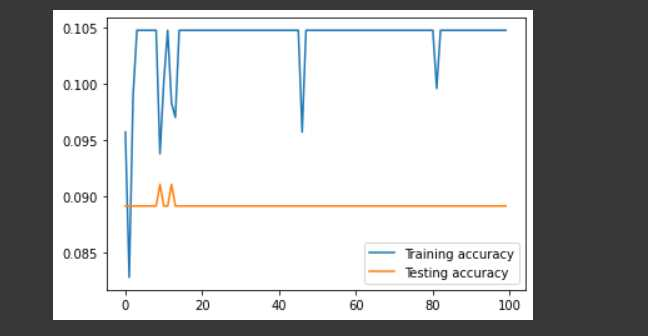

In [ ]:
# predict 
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)

In [ ]:
y_pred1 = [np.argmax(i) for i in Y_pred]
print(y_pred1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

                        CONFUSION MATRIX AND CLASSIFICATION REPORT   
  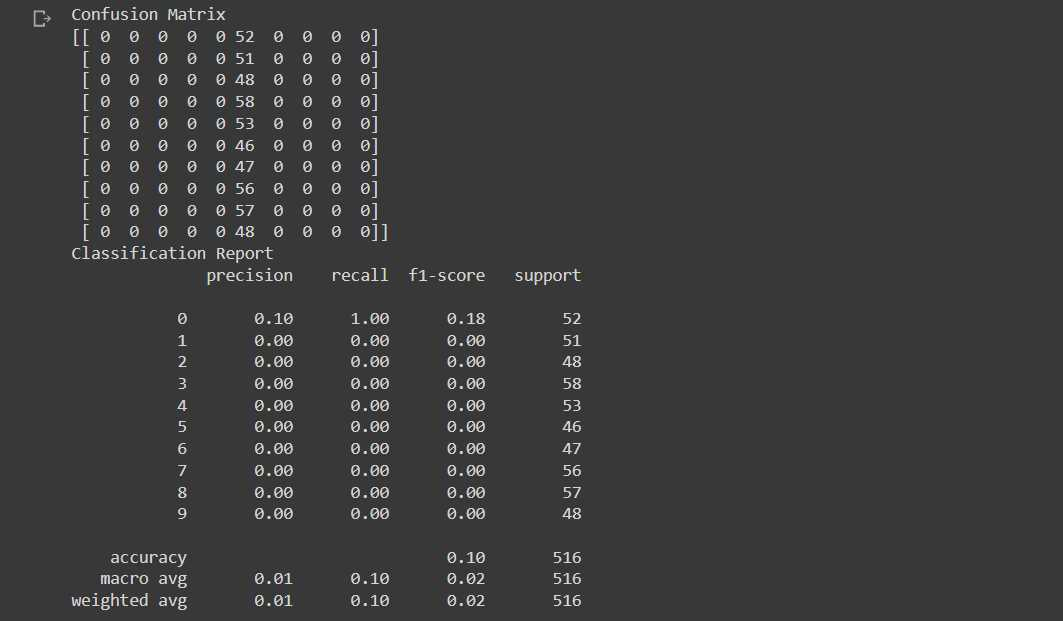

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))
print('Classification Report')
print(classification_report(y_test_arg,y_pred1))

Confusion Matrix
[[ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  0]
 [ 0  0  0  0  0 53  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0]
 [ 0  0  0  0  0 57  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        52
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        53
           5       0.00      0.00      0.00        46
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00        56
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00        48

    accuracy                      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
